# Feature Ideas

- time between hand-off and snap
- area of space infront of ball carrier
    - from other team
    - from own team
    - from everyone
- distance from endzone
- distance from first down
- current down

In [12]:
# options
options(repr.plot.width=12, repr.plot.height=8, warn = -1)
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
options(scipen=999)

# libraries
suppressMessages(library(janitor))
suppressMessages(library(tidyverse))

# functions
source("../src/plots.R")

In [8]:
train <- read_csv("../data/train_clean.csv", col_types = cols())

In [9]:
head(train)

game_id,play_id,team,x,y,s,a,dis,orientation,dir,nfl_id,display_name,jersey_number,season,line_of_scrimmage,quarter,game_clock,possession_team,down,yards_to_first_down,field_position,home_score_before_play,visitor_score_before_play,nfl_id_rusher,offense_formation,offense_personnel,defenders_in_the_box,defense_personnel,play_direction,time_handoff,time_snap,rushing_yards,player_height,player_weight,player_birth_date,player_college_name,position,home_team_abbr,visitor_team_abbr,week,stadium,location,stadium_type,turf,game_weather,temperature,humidity,wind_speed,wind_direction,to_left,is_ball_carrier,team_on_offense,is_on_offense,yards_from_own_goal,yards_to_td,x_std,y_std
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63,77,8,SW,TRUE,FALSE,home,FALSE,35,65,36.09,18.49333
2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63,77,8,SW,TRUE,FALSE,home,FALSE,35,65,35.33,20.69333
2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63,77,8,SW,TRUE,FALSE,home,FALSE,35,65,36.00,20.13333
2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63,77,8,SW,TRUE,FALSE,home,FALSE,35,65,38.54,25.63333
2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63,77,8,SW,TRUE,FALSE,home,FALSE,35,65,40.68,17.91333
2017090700,20170907000118,away,75.06,24.00,1.01,0.32,0.18,308.34,95.01,2543494,Dee Ford,55,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-2,252,03/19/1991,Auburn,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63,77,8,SW,TRUE,FALSE,home,FALSE,35,65,34.94,29.33333


### Space around ball carrier

In [10]:
sample_1 <- train %>% filter(play_id == 20171022093887)

In [14]:
sample_1

game_id,play_id,team,x,y,s,a,dis,orientation,dir,nfl_id,display_name,jersey_number,season,line_of_scrimmage,quarter,game_clock,possession_team,down,yards_to_first_down,field_position,home_score_before_play,visitor_score_before_play,nfl_id_rusher,offense_formation,offense_personnel,defenders_in_the_box,defense_personnel,play_direction,time_handoff,time_snap,rushing_yards,player_height,player_weight,player_birth_date,player_college_name,position,home_team_abbr,visitor_team_abbr,week,stadium,location,stadium_type,turf,game_weather,temperature,humidity,wind_speed,wind_direction,to_left,is_ball_carrier,team_on_offense,is_on_offense,yards_from_own_goal,yards_to_td,x_std,y_std
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
2017102209,20171022093887,away,50.17,25.05,2.48,0.90,0.23,334.16,163.65,2532896,Joe Looney,73,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-3,315,08/31/1990,Wake Forest,C,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,40.17,25.05
2017102209,20171022093887,away,50.97,32.53,4.44,2.00,0.49,35.64,141.82,2533028,James Hanna,84,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-4,260,07/14/1989,Oklahoma,TE,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,40.97,32.53
2017102209,20171022093887,away,52.17,27.48,4.05,0.27,0.45,348.03,148.57,2539272,Jonathan Cooper,64,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-2,308,01/19/1990,North Carolina,G,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,42.17,27.48
2017102209,20171022093887,away,50.44,26.07,2.21,1.26,0.28,3.56,177.84,2540161,Travis Frederick,72,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-4,320,03/18/1991,Wisconsin,C,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,40.44,26.07
2017102209,20171022093887,away,47.83,25.53,2.96,0.43,0.33,61.23,155.21,2550400,Keith Smith,41,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-0,240,04/08/1992,San Jose State,FB,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,37.83,25.53
2017102209,20171022093887,away,50.41,28.50,4.59,1.17,0.50,11.03,160.50,2552666,Chaz Green,79,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-5,318,04/08/1992,Florida,G,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,40.41,28.50
2017102209,20171022093887,away,48.84,30.69,2.90,1.61,0.31,338.99,179.61,2553454,Geoff Swaim,87,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-4,260,09/16/1993,Texas,TE,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,38.84,30.69
2017102209,20171022093887,away,51.92,24.59,3.21,2.27,0.35,348.70,133.85,2553505,La'el Collins,71,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-4,

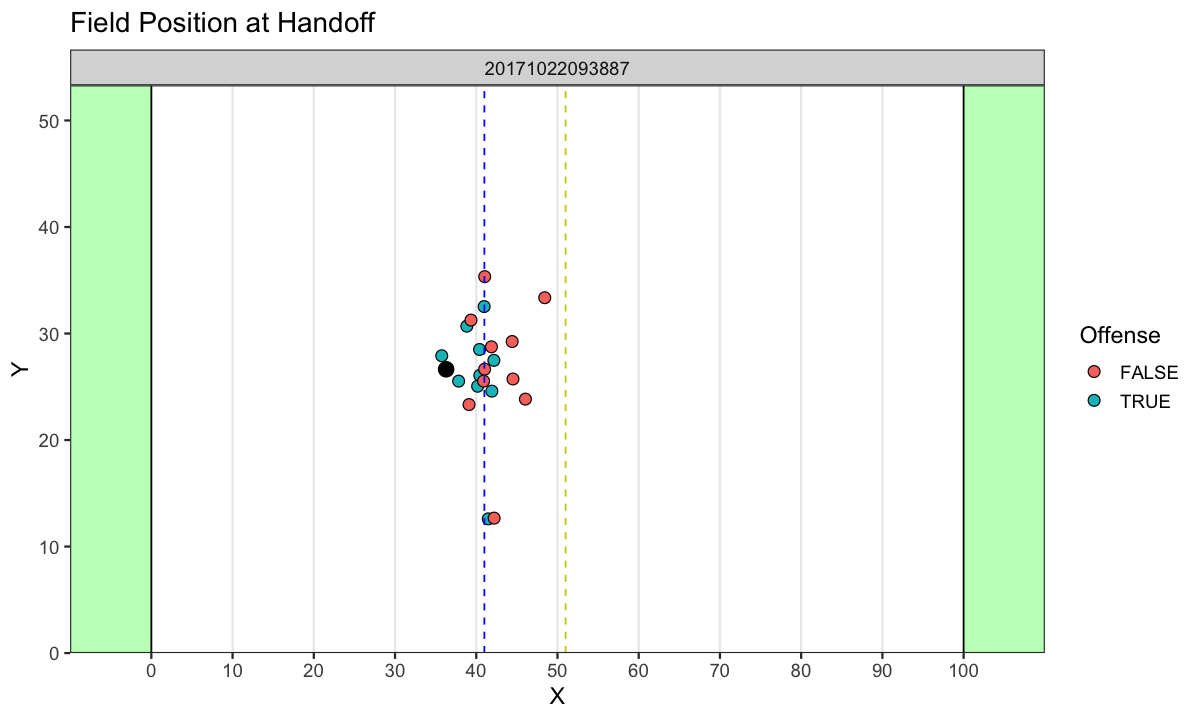

In [16]:
options(repr.plot.width=10, repr.plot.height=6, warn = -1)
plot_field(sample_1)

Calculate the distance between two players:

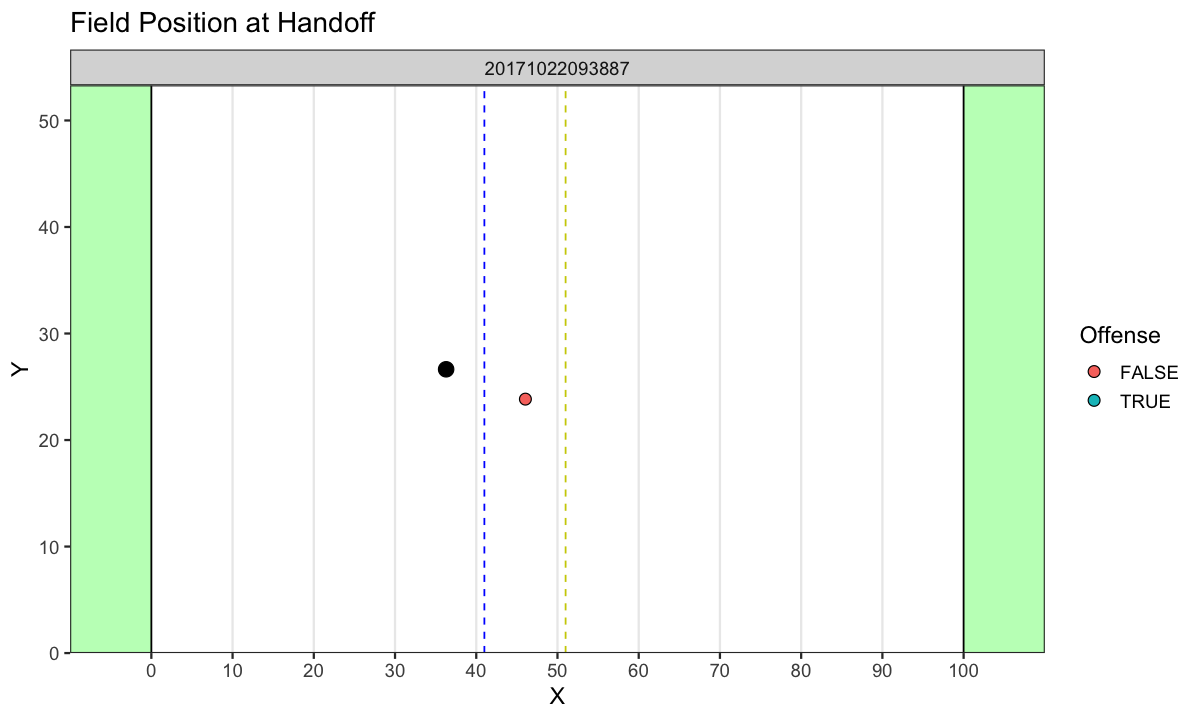

In [65]:
plot_field(filter(sample_1, nfl_id == 2543741 | is_ball_carrier))

In [66]:
filter(sample_1, nfl_id == 2550285 | is_ball_carrier)

game_id,play_id,team,x,y,s,a,dis,orientation,dir,nfl_id,display_name,jersey_number,season,line_of_scrimmage,quarter,game_clock,possession_team,down,yards_to_first_down,field_position,home_score_before_play,visitor_score_before_play,nfl_id_rusher,offense_formation,offense_personnel,defenders_in_the_box,defense_personnel,play_direction,time_handoff,time_snap,rushing_yards,player_height,player_weight,player_birth_date,player_college_name,position,home_team_abbr,visitor_team_abbr,week,stadium,location,stadium_type,turf,game_weather,temperature,humidity,wind_speed,wind_direction,to_left,is_ball_carrier,team_on_offense,is_on_offense,yards_from_own_goal,yards_to_td,x_std,y_std
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
2017102209,20171022093887,away,46.29,26.64,4.91,1.92,0.55,21.43,133.39,2553743,Rod Smith,45,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-3,235,01/10/1992,Ohio State,RB,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,TRUE,away,TRUE,41,59,36.29,26.64
2017102209,20171022093887,home,54.52,25.73,3.66,1.01,0.48,145.85,188.97,2550285,Brock Coyle,50,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-1,245,10/12/1990,Montana,MLB,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,FALSE,41,59,44.52,25.73


In [111]:
ball_carrier_coords <- sample_1 %>% filter(is_ball_carrier) %>% select(x_std, y_std)
defense_coords <- sample_1 %>% filter(nfl_id == 2550285) %>% select(x_std, y_std)
distance_x <- abs(defense_coords$x_std - ball_carrier_coords$x_std)
distance_y <- abs(defense_coords$y_std - ball_carrier_coords$y_std)
distance_z <- sqrt(distance_x^2 + distance_y^2)
# z_coords <- tibble(x_std = defense_coords$x_std,
#                    y_std = ball_carrier_coords$y_std)
                  

# https://stackoverflow.com/questions/28185743/draw-a-half-circle-with-ggplot2
circleFun <- function(center=c(0,0), diameter=1, npoints=100, start=0, end=2) {
  tt <- seq(start*pi, end*pi, length.out=npoints)
  data.frame(x = center[1] + diameter / 2 * cos(tt), 
             y = center[2] + diameter / 2 * sin(tt))
}

df_circle <- circleFun(c(ball_carrier_coords$x_std, ball_carrier_coords$y_std),
                       distance_z * 2, 
                       start=1.5, 
                       end=2.5)
                  
                  

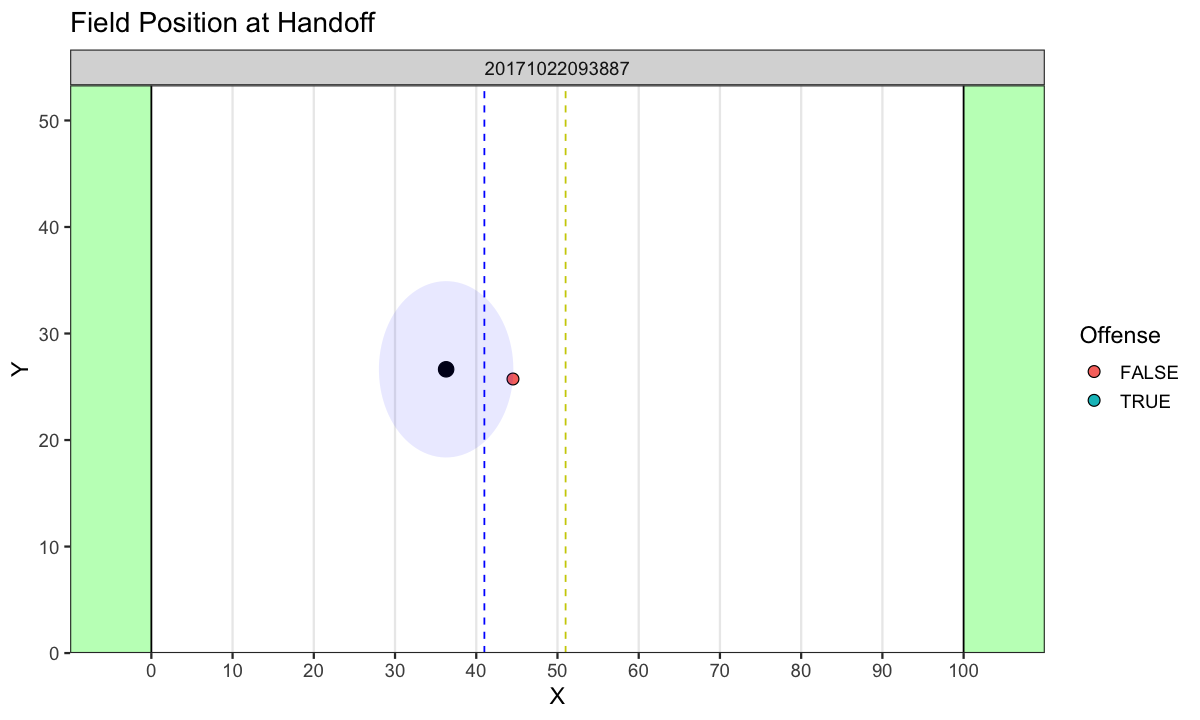

In [112]:
# tmp <- tibble(x = c(defense_coords$x_std, ball_carrier_coords$x_std, z_coords$x_std),
#               y = c(defense_coords$y_std, ball_carrier_coords$y_std, z_coords$y_std))

plot_field(filter(sample_1, nfl_id == 2550285 | is_ball_carrier)) +
    geom_polygon(data = df_circle, aes(x, y), fill = "blue", alpha = 1/11)

[1] 496822
[1] 2506816
[1] 2507373
[1] 2541792
[1] 2543739
[1] 2543741
[1] 2550285
[1] 2552391
[1] 2552494
[1] 2558018
[1] 2558157


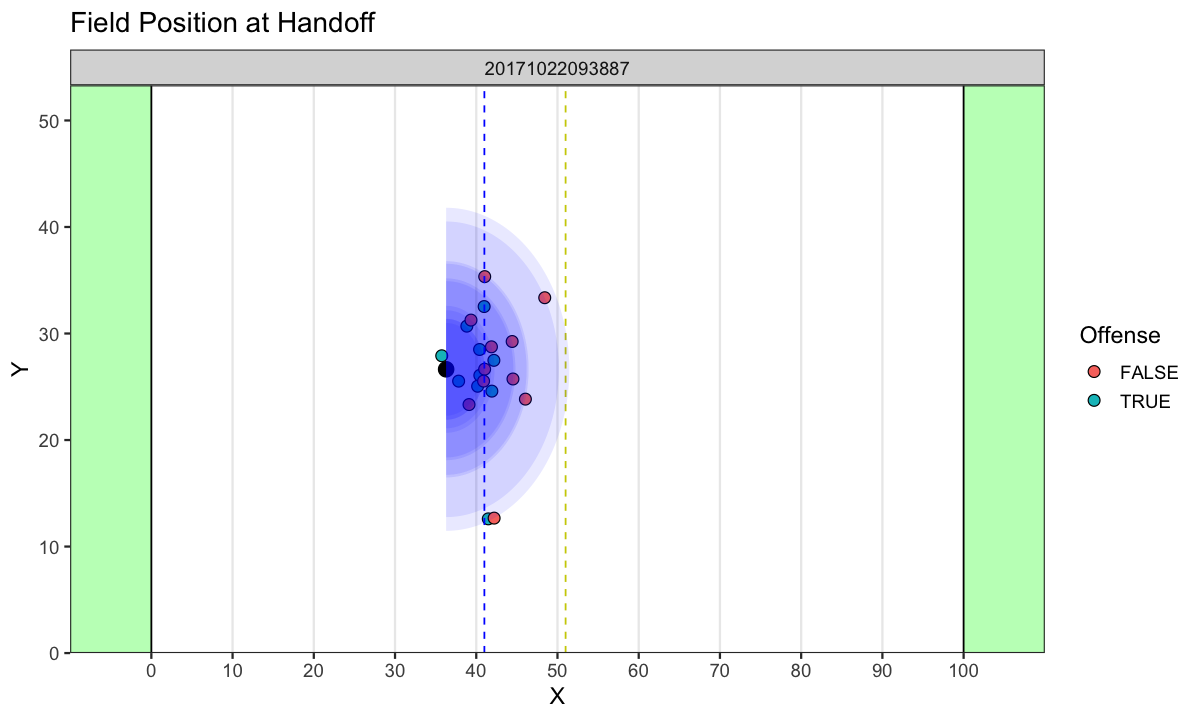

In [120]:
field <- plot_field(sample_1)

ball_carrier_coords <- sample_1 %>% filter(is_ball_carrier) %>% select(x_std, y_std)

for (i in filter(sample_1, is_on_offense == FALSE)$nfl_id) {
    print(i)
    
    
    # calculate distances
    defense_coords <- sample_1 %>% filter(nfl_id == i) %>% select(x_std, y_std, nfl_id)
    distance_x <- abs(defense_coords$x_std - ball_carrier_coords$x_std)
    distance_y <- abs(defense_coords$y_std - ball_carrier_coords$y_std)
    distance_z <- sqrt(distance_x^2 + distance_y^2)
    
    # calculate semi circle
    df_circle <- circleFun(c(ball_carrier_coords$x_std, ball_carrier_coords$y_std),
                           distance_z * 2,
                           start = 1.5,
                           end = 2.5)
                      
    # update plot
    field <- field + 
        geom_polygon(data = df_circle, aes(x, y), fill = "blue", alpha = 1/11)
                      
}

field  
#     scale_y_continuous(limits = c(10, 40)) + 
#     scale_x_continuous(limits = c(30, 50))

Triangle plotting

 [1]  496822 2506816 2507373 2541792 2543739 2543741 2550285 2552391 2552494
[10] 2558018 2558157
# A tibble: 11 x 3
   x_std y_std  nfl_id
   <dbl> <dbl>   <dbl>
 1  41.0  26.6  496822
 2  41.9  28.8 2506816
 3  40.9  25.5 2507373
 4  44.4  29.2 2541792
 5  41.0  35.3 2543739
 6  46.0  23.8 2543741
 7  44.5  25.7 2550285
 8  48.4  33.4 2552391
 9  39.1  23.3 2552494
10  39.4  31.3 2558018
11  42.2  12.7 2558157
# A tibble: 11 x 2
   x_std y_std
   <dbl> <dbl>
 1  41.0  26.6
 2  41.9  26.6
 3  40.9  26.6
 4  44.4  26.6
 5  41.0  26.6
 6  46.0  26.6
 7  44.5  26.6
 8  48.4  26.6
 9  39.1  26.6
10  39.4  26.6
11  42.2  26.6


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


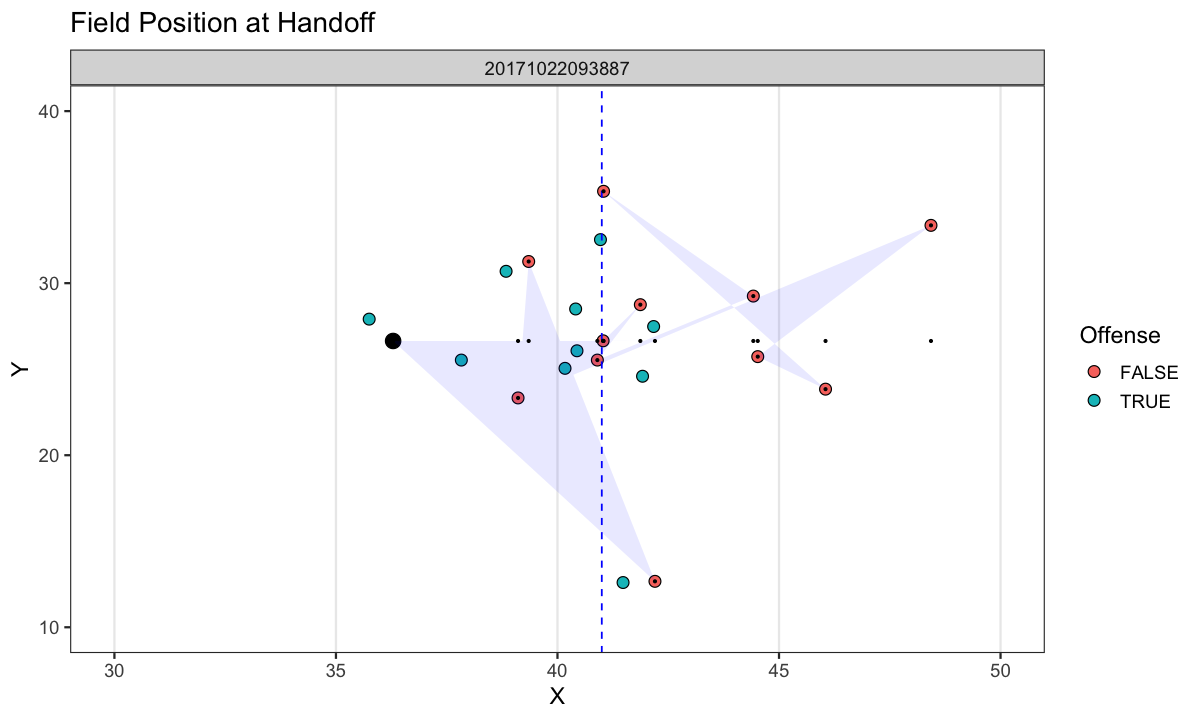

In [107]:
field <- plot_field(sample_1)

ball_carrier_coords <- sample_1 %>% filter(is_ball_carrier) %>% select(x_std, y_std)

for (i in sample_1[sample_1$is_on_offense == FALSE, "nfl_id"]) {
    
    print(i)
    
    # calculate distances
    defense_coords <- sample_1 %>% filter(nfl_id == i) %>% select(x_std, y_std, nfl_id)
    print(defense_coords)
    distance_x <- abs(defense_coords$x_std - ball_carrier_coords$x_std)
    distance_y <- abs(defense_coords$y_std - ball_carrier_coords$y_std)
    distance_z <- sqrt(distance_x^2 + distance_y^2)
    z_coords <- tibble(x_std = defense_coords$x_std,
                       y_std = ball_carrier_coords$y_std)
    print(z_coords)
    
    tmp <- tibble(x = c(defense_coords$x_std, ball_carrier_coords$x_std, z_coords$x_std),
                  y = c(defense_coords$y_std, ball_carrier_coords$y_std, z_coords$y_std))
                      
    # update plot
    field <- field + 
        geom_polygon(data = tmp, aes(x, y), fill = "blue", alpha = 1/11) +
        geom_point(data = tmp, aes(x, y), fill = "blue", size = 0.5)
                      
}

field + 
    scale_y_continuous(limits = c(10, 40)) + 
    scale_x_continuous(limits = c(30, 50))